In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('car data.csv')

print("First 5 rows of the dataset:")
print(df.head())

# Get information about the columns and data types
print("\nInformation about the dataset:")
print(df.info())

First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2  

In [3]:
current_year = 2025
df['Years_Old'] = current_year - df['Year']

df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [4]:
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

linear_reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', LinearRegression())])

random_forest_reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model.fit(X_train, y_train)

random_forest_reg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Present_Price',
                                                   'Driven_kms', 'Owner',
                                                   'Years_Old']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

Linear Regression Model Performance:
R-squared: 0.8489
MAE: 1.2164

Random Forest Regressor Model Performance:
R-squared: 0.9609
MAE: 0.6258


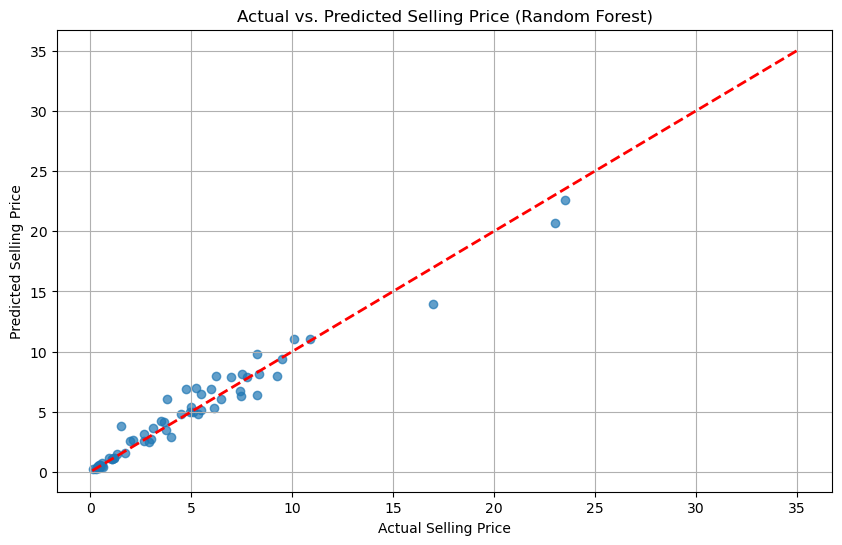

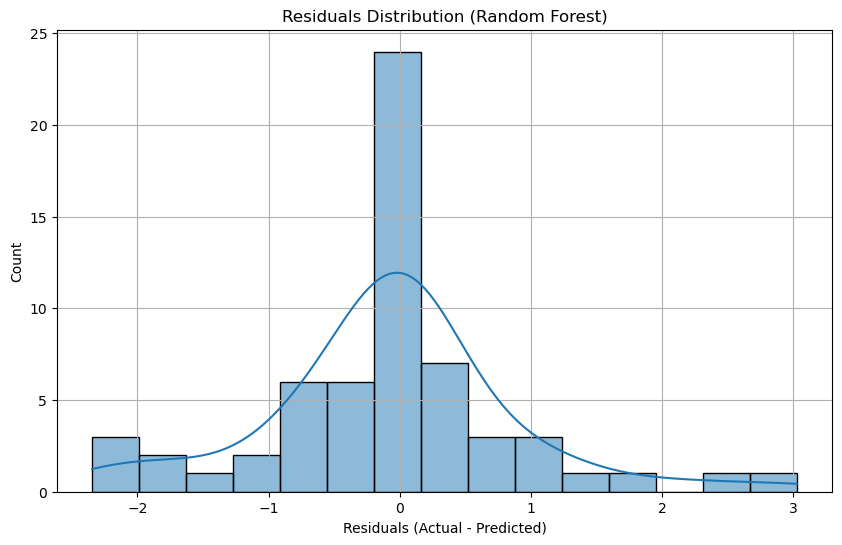

In [6]:
y_pred_linear = linear_reg_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("Linear Regression Model Performance:")
print(f"R-squared: {r2_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")

y_pred_rf = random_forest_reg_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("\nRandom Forest Regressor Model Performance:")
print(f"R-squared: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price (Random Forest)")
plt.grid(True)
plt.show()

residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residuals Distribution (Random Forest)")
plt.grid(True)
plt.show()